In [26]:
%run init.ipynb
%run gates.ipynb
%run states.ipynb
%run ptr.ipynb

# Complementarity relation
For a given coherence measures $C$, it is possible to find one or more predictability measure $P$ such that
\begin{equation}
C(\rho_{A})+P(\rho_{A}) \le u(d_{A}),
\end{equation}
with $u(d_{A})$ beind a function only of the system dimension $d_{A}$. In principle, for pure states $|\psi\rangle_{AB}$, it is possible to find a quantum correlation measure $A$ that completes the above CR such that
\begin{equation}
C(\rho_{A})+P(\rho_{A})+Q(|\psi\rangle_{AB}) = u(d_{A}).
\end{equation}

## Werner-like one qubit state
We begin with a one-qubit state
\begin{equation}
\rho_{w,x} = w|\psi\rangle\langle\psi|+(1-w)\mathbb{I}_{2}/2,
\end{equation}
with $|\psi\rangle=\sqrt{x}|0\rangle+\sqrt{1-x}|1\rangle$.

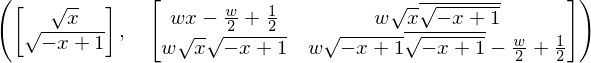

In [27]:
x,w=symbols('x w', positive=True, real=True)
psi = sqrt(x)*cb(2,0) + sqrt(1-x)*cb(2,1); rho = w*proj(psi)+(1-w)*id(2)/2
#psi,rho

Purification
\begin{equation}
|\psi\rangle_{AB} = (-\sqrt{1-x}|0\rangle_{A} + \sqrt{x}|1\rangle_{A})\otimes\sqrt{\frac{1-w}{2}}|0\rangle_{B}+ (\sqrt{x}|0\rangle_{A} + \sqrt{1-x}|1\rangle_{A})\otimes\sqrt{\frac{1+w}{2}}|1\rangle_{B}.
\end{equation}

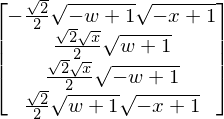

In [11]:
psiAB_xw = tp((-sqrt(1-x)*cb(2,0)+sqrt(x)*cb(2,1)),(sqrt((1-w)/2)*cb(2,0))) \
        + tp((sqrt(x)*cb(2,0)+sqrt(1-x)*cb(2,1)),(sqrt((1+w)/2)*cb(2,1))) 
#simplify(psiAB_xw)

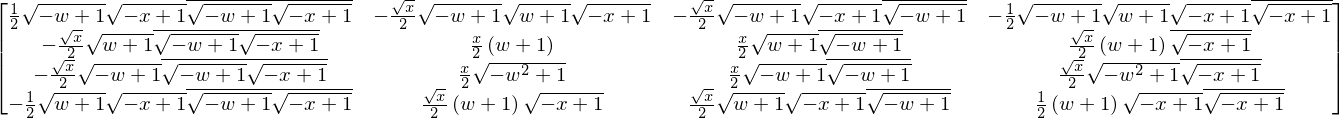

In [12]:
#rhoAB_xw = proj(psi_xw); simplify(rhoAB_xw)

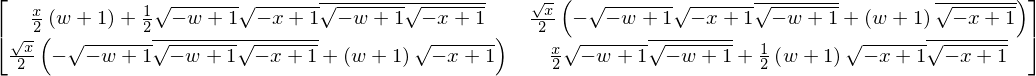

In [14]:
rhoA_xw = ptraceB(2, 2, rhoAB_xw)
#simplify(rhoA_xw)

# $l_{1}$-norm complementarity
\begin{equation}
C_{l_{1}}(\rho_{A})+P_{l_{1}}(\rho_{A})+Q_{l_{1}}(\rho_{A})=d_{A}-1
\end{equation}
with $\rho_{A}=Tr_{B}(|\psi\rangle_{AB}\langle\psi|$)
## $l_{1}$-norm coherence
\begin{equation}
C_{l_{1}}(\rho_{A}) = \sum_{j\ne k}|\rho^{A}_{j,j}| = 2\sum_{j<k}|\rho^{A}_{j,j}|
\end{equation}

In [15]:
def coh_l1(d,rho):
    C = 0
    for j in range(0,d-1):
        for k in range(j+1,d):
            C += abs(rho[j,k])
    return 2*C

In [18]:
#r1,r2,r3 = symbols('r_{1} r_{2} r_{3}'); simplify(coh_l1(2,rho1qb(r1,r2,r3)))

## $l_{1}$-norm predictability
\begin{equation}
P_{l_{1}}(\rho_{A}) = d-1-\sum_{j\ne k}\sqrt{\rho^{A}_{j,j}\rho^{A}_{k,k}}= d-1-2\sum_{j<k}\sqrt{\rho^{A}_{j,j}\rho_{k,k}}
\end{equation}

In [19]:
def predict_l1(d,rho):
    P = 0
    for j in range(0,d-1):
        for k in range(j+1,d):
            P += sqrt(rho[j,j]*rho[k,k])
    return d-1-2*P

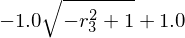

In [20]:
#r1,r2,r3 = symbols('r_{1} r_{2} r_{3}'); simplify(predict_l1(2,rho1qb(r1,r2,r3)))

## $l_{1}$-norm quantum correlation
\begin{equation}
Q_{l_{1}}(\rho_{AB}) = \sum_{j\ne k}\left(\sqrt{\rho^{A}_{jj}\rho^{A}_{kk}}-|\rho^{A}_{jk}|\right)=2\sum_{j< k}\left(\sqrt{\rho^{A}_{jj}\rho^{A}_{kk}}-|\rho^{A}_{jk}|\right),
\end{equation}
with $\rho^{A}=Tr_{B}(\rho_{AB})$

In [30]:
def qcorr_l1(da,db,rhoAB):
    rhoA = ptraceB(da, db, rhoAB)
    qc = 0
    for j in range(0,da-1):
        for k in range(j+1,da):
            qc += sqrt(rhoA[j,j]*rhoA[k,k]) - abs(rhoA[j,k])
    return 2*qc

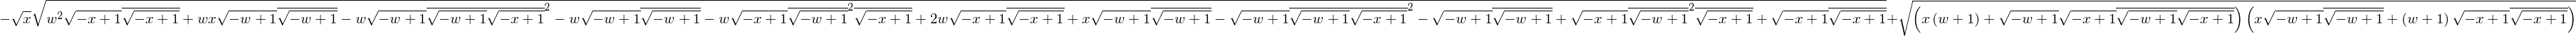

In [31]:
simplify(qcorr_l1(2,2,rhoAB_xw))

# Hilbert-Schmidt complementarity
## Hilbert-Schmidt coherence
\begin{equation}
C_{hs}(\rho) = \sum_{j\ne k}|\rho_{j,k}|^{2} = 2\sum_{j<k}|\rho_{j,k}|^{2}
\end{equation}

In [21]:
def coh_hs(d,rho):
    C = 0
    for j in range(0,d-1):
        for k in range(j+1,d):
            C += (abs(rho[j,k]))**2
    return 2*C

In [22]:
#r1,r2,r3 = symbols('r_{1} r_{2} r_{3}'); simplify(coh_hs(2,rho1qb(r1,r2,r3)))

## Hilbert-Schmidt-linear predictability
\begin{equation}
P_{hs}^{l}(\rho) = \frac{d-1}{d}-2\sum_{j<k}\rho_{j,j}\rho_{k,k}
\end{equation}

In [29]:
def predict_hs_l(d,rho):
    P = 0
    for j in range(0,d-1):
        for k in range(j+1,d):
            P += abs(rho[j,j])*abs(rho[k,k])
    return (d-1)/d-2*P

In [30]:
#r1,r2,r3 = symbols('r_{1} r_{2} r_{3}'); simplify(predict_hs_l(2,rho1qb(r1,r2,r3)))

## Hilbert-Schmidt-linear quantum correlation


## Hilbert-Schmidt-von Neumann predictability
\begin{equation}
P_{hs}^{vn}(\rho) = \ln(d)+\sum_{j=1}^{d}\rho_{j,j}\ln(\rho_{j,j})
\end{equation}

In [23]:
def predict_hs_vn(d,rho):
    P = 0
    for j in range(0,d):
        P += abs(rho[j,j])*ln(abs(rho[j,j]))
    return ln(d)+P

In [9]:
#r1,r2,r3 = symbols('r_{1} r_{2} r_{3}'); simplify(predict_hs_vn(2,rho1qb(r1,r2,r3)))

## Hilbert-Schmidt-von Neumann quantum correlation

# Wigner-Yanase complementarity
## Wigner-Yanase coherence
\begin{equation}
C_{wy}(\rho) = \sum_{j\ne k}|(\sqrt{\rho})_{j,k}|^{2} = 2\sum_{j<k}|(\sqrt{\rho})_{j,k}|^{2}
\end{equation}

In [19]:
def coh_wy(d,rho):
    rho_sqrt = mat_sqrt(d,rho)
    C = 0
    for j in range(0,d-1):
        for k in range(j+1,d):
            C += abs(rho_sqrt[j,k])**2
    return 2*C

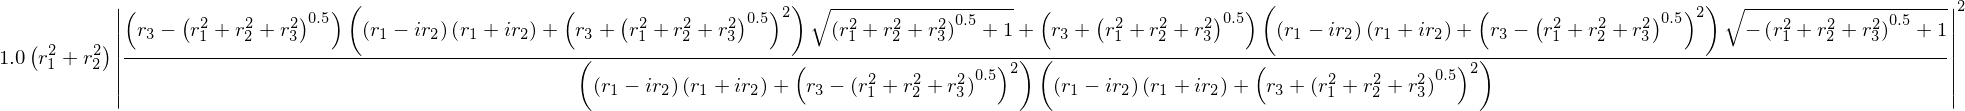

In [22]:
#r1,r2,r3 = symbols('r_{1} r_{2} r_{3}'); simplify(coh_wy(2,rho1qb(r1,r2,r3)))

## Wigner-Yanase predictability

## Wigner-Yanase quantum correlation

# Relative entropy complementarity
## Relative entropy coherence
\begin{equation}
C_{re}(\rho) = S(\rho_{diag})-S(\rho),
\end{equation}
with $\rho_{diag}=diag(\rho_{1,1},\rho_{2,2},\cdots,\rho_{d,d})$.

In [22]:
def coh_re(d,rho):
    for j in range(0,d):
        pv[j] = rho[j,j]
    return shannon(d,pv) - von_neumann(d,rho)

In [25]:
#r1,r2,r3 = symbols('r_{1} r_{2} r_{3}'); float(coh_re(2,rho1qb(1,0,0)))

## Relative entropy predictability
It is equal to the Hilbert-Schmidt-von Neumann predictability.

## Relative entropy quantum correlation